In [1]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys

import time
import pandas as pd
import numpy as np

/Users/choejuhui/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [39]:
driver = webdriver.Chrome()
url = 'https://m.place.naver.com/restaurant/1556545642/review/visitor'
driver.get(url)
time.sleep(3)

html = driver.page_source
soup = bs(html, 'html.parser')

review_lists = soup.select('#app-root > div > div > div > div:nth-child(6) > div:nth-child(2) > div.place_section.k1QQ5 > div.place_section_content > ul > li')
print('총 리뷰 수 :', len(review_lists))

review_button = driver.find_elements(By.CLASS_NAME, 'sIv5s.WPk67')
for i in review_button:
    i.send_keys(Keys.ENTER)
    time.sleep(1)
    
for j, review in enumerate(review_lists):
    try:
        try:
            review.find('div.vg7Fp.CyA_N > a > span.rvCSr > svg')
            more_content = review.select('div.vg7Fp.CyA_N > a > span.rvCSr > svg')
            more_content.click()
            time.sleep(1)

            user_review = review.select('div.vg7Fp.CyA_N > a > span.zPfVt')
            print(user_review[0].text)

            user_keyword = review.select('div > div.ERkm0 > span')
            
            print(user_keyword)
            time.sleep(1)
        
        except:
            #more_keyword = review.select('div > div.ERkm0 > a')
            #more_keyword.click()
            #time.sleep(1)

            user_review = review.select('div.vg7Fp.CyA_N > a > span.zPfVt')
            print(user_review[0].text)

            user_keyword = review.select('div > div.ERkm0 > span')
            print(user_keyword)
            time.sleep(1)
    except:
        print('리뷰 텍스트 인식 안됨')
        continue

driver.close()

총 리뷰 수 : 10
갓투긴 케이준 프라이만으로도 완전 만족 새우살 탱글탱글 근데 소스가 느끼함  스파이시 했다면  최고일듯
[<span class="sIv5s"><img alt="" class="TCCFO" height="18" src="https://ssl.pstatic.net/static/pup/emoji/rice_ball20220119222026.png" width="18"/>혼밥하기 좋아요</span>]
매장 인테리어도 통통튀고 깔끔하고 직원분들도 친절하셔서 기분좋게 쾌적하게 방문하기 좋았어요 👌  만원홀리팩은 버거에 너겟 비스켓과 에이드까지 구성이 너무 알차서 가성비도 좋고 푸짐한 양에 
든든함까지 최고에요 👍  버거는 진짜 두툼하고 야채도 가득해서 씹는맛 너무 좋고, 돈이 아깝지 않아요! 비스켓은 뭐 말하지 않아도 맛있고, 복숭아에이드가 이렇게 탄산 톡톡~ 달콤상콤 맛있는지 처음 
알았어요😉  파파이스 넘 맛있는데, 저희동네에도 성남신흥점 같은 쾌적하고 친절한 매장이 있음 좋겠어요🤩
[<span class="sIv5s"><img alt="" class="TCCFO" height="18" src="https://ssl.pstatic.net/static/pup/emoji/face_savoring_food20220119222022.png" width="18"/>음식이 맛있어요</span>]
파파이스 매장 찾기 힘든데 있어서 들어간매장 일단 매장 쾌적 컨디션이나 깔끔유지하려는 점장?모습 좋았고 굉장히 친절햇음 맛도 훌륭하고 위생신경쓰는 모습에 더 기분이 좋앗음
[<span class="sIv5s"><img alt="" class="TCCFO" height="18" src="https://ssl.pstatic.net/static/pup/emoji/face_savoring_food20220119222022.png" width="18"/>음식이 맛있어요</span>]
친절하세요 배달 주문이 많다보니까 대기시간 안내부터 먼저 해주셔서 앉아서 기다렸습니다 맛도 있

## 최종본

In [2]:
final_df = pd.read_csv('제스티살룬 성수.csv', index_col=0)

In [ ]:
# 라이브러리 호출
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import time
import pandas as pd

# 크롤링 함수
def review_crawling(id):    
    driver = webdriver.Chrome()
    df = pd.DataFrame(columns=['restaurant', 'username', 'userid_r','userid_p','userid_f', 'score',
                           'method', 'text', 'keyword','visit_date', 'visit_time'])
    url = 'https://m.place.naver.com/restaurant/'+str(id)+'/review/visitor'
    driver.get(url)
    time.sleep(3)

    restaurant = driver.find_element(By.CLASS_NAME, 'GHAhO').text
    while True:
        try:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            button = driver.find_element(By.CLASS_NAME, 'fvwqf')
            button.send_keys(Keys.ENTER)
        except:
            break

    
    li = driver.find_elements(By.CLASS_NAME, 'owAeM')

    for i in li:
        name = i.find_element(By.CLASS_NAME, 'P9EZi').text # 고객 이름
        id_list = i.find_elements(By.CLASS_NAME, 'RNn6x') # 추가 식별자
        try: id_r = id_list[0].text.split(' ')[-1] # 리뷰
        except: id_r = 0
        try: id_p = id_list[1].text.split(' ')[-1] # 사진
        except: id_p = 0
        try: id_f = id_list[2].text.split(' ')[-1] # 팔로워
        except: id_f = 0
        
        methods = i.find_elements(By.CLASS_NAME, 'xalSr') # 이용 방법
        method = []
        for j in methods:
            method.append(j.text)

        try:
            i.find_element(By.CLASS_NAME, 'sIv5s.WPk67').send_keys(Keys.ENTER)
        except:
            try:
                i.find_element(By.CLASS_NAME, 'xHaT3').send_keys(Keys.ENTER)
            except:
                pass
            
        review_text = i.find_element(By.CLASS_NAME, 'zPfVt').text # 리뷰 내용
        
        emotions = i.find_elements(By.CLASS_NAME, 'sIv5s') # 키워드
        emotion = []
        for j in emotions:
            emotion.append(j.text)

        visit = i.find_elements(By.CLASS_NAME, 'CKUdu')
        visitdate = visit[0].text.split('\n')[-1]
        visittime = visit[1].text[0]

        try:
            score = i.find_element(By.CLASS_NAME, 'FMf0T').text.split('\n')[1]
        except:
            score = 'NaN'

        new_data = [restaurant, name, id_r, id_p, id_f, score, method, review_text, emotion, visitdate, visittime]
        df = pd.concat([df, pd.DataFrame([new_data], columns=df.columns)], ignore_index=True)

    driver.close()

    return df

# id 리스트 가져오기
id_df = pd.read_csv('id식별자.csv')
id_list = id_df[id_df['person']=='최주희']['id'].tolist() # 본인 이름 기입하기

# 데이터프레임 생성
#final_df = pd.DataFrame(columns=['restaurant', 'username', 'userid_r','userid_p','userid_f','score',
#                          'method', 'text', 'keyword','visit_date', 'visit_time'])

# 데이터 크롤링
for num in id_list[63:]:
    cache = review_crawling(num)
    final_df = pd.concat([final_df, cache])

#저장
final_df.to_csv('review_crawling(주희).csv') # 본인 이름 기입하기

# EDA

In [2]:
final_df = pd.read_csv('review_crawling(주희).csv', index_col=0)
final_df

,restaurant,username,userid_r,userid_p,userid_f,score,method,text,keyword,visit_date,visit_time
0,오크버거,타이로프,13,34,0,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 데이트', '동행 연...",사진에서 빵이 맛있어보여 방문했어요~\n\n진짜 빵이 고소해요~\n\n소고기 패티는...,"['음식이 맛있어요', '인테리어가 멋져요', '컨셉이 독특해요', '친절해요', ...",2024년 5월 3일 금요일,1
1,오크버거,진제민,3,3,0,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 여행, 가족모임', ...",지나가다가 우연찮게 들어왔던 가게입니다! 가게 인테리어부터 시작해서 미국 느낌 난다...,"['음식이 맛있어요', '재료가 신선해요', '고기 질이 좋아요', '사진이 잘 나...",2024년 4월 6일 토요일,1
2,오크버거,오잉짱,34,14,0,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 데이트', '동행 연...",제주도 여행왔다가 수제버거땡겨서 찾아온곳인데 인테리어도 힙하고 사장님도 엄청 친절하...,"['음식이 맛있어요', '특별한 메뉴가 있어요', '친절해요', '주차하기 편해요'...",2024년 5월 13일 월요일,1
3,오크버거,lll****,7,6,0,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 일상', '동행 혼자']",제주도 수제버거집 여러군데 다녀봤지만 오크버거 만큼 맛있는 곳은 없었습니다! 사장님...,"['인테리어가 멋져요', '음식이 맛있어요', '메뉴 구성이 알차요', '친절해요'...",2024년 4월 27일 토요일,1
4,오크버거,krokl,4,5,0,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 일상', '동행 연인...",할라피뇨 버거 강추합니다! 느끼한맛을딱잡아주고 패티도 맛있어요 재방문의사있어요😊,"['인테리어가 멋져요', '음식이 맛있어요']",2024년 5월 11일 토요일,1
...,...,...,...,...,...,...,...,...,...,...,...
940,브루클린더버거조인트 여의도점,꼼장어11,81,5,0,4.0,[],쏘쏘해요~~,[],2019년 11월 27일 수요일,1
941,브루클린더버거조인트 여의도점,우가차자우가차차,1342,111,1,5.0,[],NaN,[],2019년 8월 30일 금요일,2
942,브루클린더버거조인트 여의도점,iii****,152,29,0,5.0,[],NaN,[],2019년 7월 31일 수요일,1
943,브루클린더버거조인트 여의도점,Melodyy,1871,101,0,4.0,[],맛있어요,[],2019년 8월 7일 수요일,1


In [3]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40182 entries, 0 to 944
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   restaurant  40182 non-null  object 
 1   username    40182 non-null  object 
 2   userid_r    40182 non-null  int64  
 3   userid_p    40182 non-null  int64  
 4   userid_f    40182 non-null  object 
 5   score       2904 non-null   float64
 6   method      40182 non-null  object 
 7   text        38628 non-null  object 
 8   keyword     40182 non-null  object 
 9   visit_date  40182 non-null  object 
 10  visit_time  40182 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 3.7+ MB


### 별점 분석

In [8]:
score_yes = final_df.dropna()
score_yes['score']

338    4.5
339    2.5
349    5.0
366    5.0
369    3.0
      ... 
936    5.0
937    5.0
939    3.0
940    4.0
943    4.0
Name: score, Length: 2782, dtype: float64

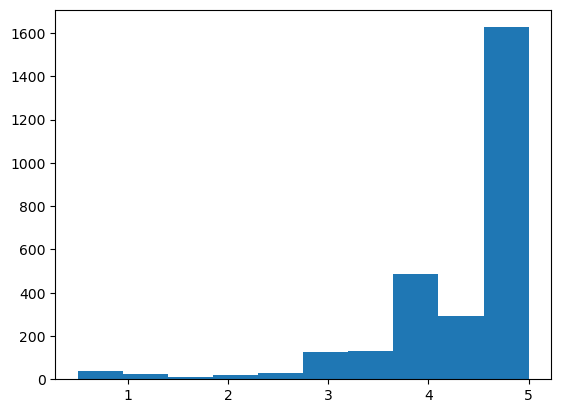

In [10]:
# 별점 데이터 분포
import matplotlib.pyplot as plt

plt.hist(score_yes['score'])
plt.show()

In [48]:
final_df[final_df['score']<=2]['text']

392               버거 3 순살 치킨 시켰는대 빵도 뻑뻑하고 불친절하고 두 번은 안와요
399    가격대비 별로였어요. 빵도질기고 내용물도 가격대비 적은거같아요. 관광지여서그런가보다...
411    버거랑 나초&칩스 테이크아웃으로 시켰는데\n나초 저거 13000원 짜리에요\n잘모르...
423            수제 버거가 맛도 없고, 매장이 지저분 해서 재방문 의사 없어요...T.T
429    맛집이라고해서 책자보고 갔는데 별로네요 \n햄버거도 그냥 m버거랑 비슷하고 \n불친...
                             ...                        
895                                           너무 짜요 ㅜㅜㅠㅠ
909    짜서 자극적이라 처음엔 맛있는데 한두입 먹다보면 이름에 걸맞지 않은 맛이에요\n버거...
916    처음 한입 먹는데 탄맛이 올라왔다 버거를 열어 보니까 패티가 위 아래가 타서 딱딱하...
924    정말 맛있어서 자주 오고싶은데 안오게 됩니다. 제발 매장에 블라인드좀 설치해주세요!...
934                                 비싼데 짜고 맛없어여.. 간판맛집^^
Name: text, Length: 93, dtype: object

### 유저들이 다른 버거집에도 리뷰를 남겼는지에 대한 분석

In [57]:
groupby_df = pd.DataFrame(final_df.groupby(['username', 'userid_r', 'userid_p','userid_f'])['restaurant'].agg(['unique','nunique','count']))
groupby_df.sort_values(by='count', ascending=False)

unique  nunique  count
username  userid_r userid_p userid_f                                         
됴됴39맛집    795      1312     2         [파이브가이즈 강남, 케이트버거 잠실본점]        2     29
진화심리학     2345     132      53                       [슬로우먼데이]        1     28
Im SK     359      284      0                [야스버거, 쉐이크쉑 청담점]        2     24
바스코41     46       34       0                   [힘난다버거 신논현역점]        1     23
짱아짱가      87       23       3                     [파이어벨 코엑스점]        1     21
...                                                       ...      ...    ...
sal****   71       20       0                     [파이브가이즈 강남]        1      1
          1        1        0                          [오프버거]        1      1
sajdhaljs 7        3        0                           [패티스]        1      1
saj****   18       8        0                       [침스버거 안국]        1      1
힝힝4419    1372     669      0               [브루클린더버거조인트 여의도점]        1      1

[33671 rows x 3 columns]

In [ ]:
final_df[final_df['username']=='됴됴39맛집']

count가 많이 나오는 경우도 있었지만 대부분이 버거집 한 곳을 매우 많이 다닌 케이스.

In [23]:
# Top 5 유저들이 다녀온 레스토랑
print(final_df[final_df['username']=='됴됴39맛집']['restaurant'].unique())
print(final_df[final_df['username']=='진화심리학']['restaurant'].unique())
print(final_df[final_df['username']=='Im SK']['restaurant'].unique())
print(final_df[final_df['username']=='바스코41']['restaurant'].unique())
print(final_df[final_df['username']=='짱아짱가']['restaurant'].unique())

['파이브가이즈 강남' '케이트버거 잠실본점']
['슬로우먼데이']
['야스버거' '쉐이크쉑 청담점']
['힘난다버거 신논현역점']
['파이어벨 코엑스점']


오히려 아예 많지 않고 적당히 count된 경우에 다양한 버거집을 다닌 유저들의 흔적들이 보임. 

In [30]:
groupby_df[groupby_df['count']==5]

,,,,count
username,userid_r,userid_p,userid_f,
2626262626,660,39,0,5
282yeon,27,15,1,5
BRAV0,1993,587,2,5
Bubblepop00,504,454,39,5
CoKe ji,1489,296,0,5
...,...,...,...,...
한집만팬다,14,18,0,5
햄벅30,18,7,0,5
헤이데이29,813,250,20,5


In [36]:
print(final_df[final_df['username']=='희야8161']['restaurant'].unique())
print(final_df[final_df['username']=='헬로하이41']['restaurant'].unique())
print(final_df[final_df['username']=='헤이데이29']['restaurant'].unique())
print(final_df[final_df['username']=='Bubblepop00']['restaurant'].unique())
print(final_df[final_df['username']=='햄벅30']['restaurant'].unique())

['피터콤마안목가게' '프랭크버거 강릉주문진점' '프랭크버거 강릉유천점' '팍스버거' '사천 010']
['알렉스 플레이스']
['슬로우먼데이' '슈퍼두퍼 코엑스 스타필드점']
['텐핑거 청담점' '쉐이크쉑 청담점']
['쉘터버거']


In [38]:
groupby_df[groupby_df['count']==8]

,,,,count
username,userid_r,userid_p,userid_f,
Youryeong,934,1501,75,8
borntoready,650,294,25,8
cel****,139,81,0,8
chris2388,1826,1220,0,8
gnomij,746,46,0,8
joo****,983,360,15,8
lan****,313,17,0,8
lov****,460,2,0,8
noname261743514,1056,128,0,8


In [43]:
print(final_df[final_df['username']=='햄박']['restaurant'].unique())
print(final_df[final_df['username']=='lan****']['restaurant'].unique())
print(final_df[final_df['username']=='tee****']['restaurant'].unique())
print(final_df[final_df['username']=='joo****']['restaurant'].unique())

['파이어벨 대치본점' '옐로트렁크' '슈퍼두퍼 코엑스 스타필드점' '쉐이크쉑 청담점']
['버거307 제주함덕점' '카페오션스강릉버거' '알렉스 플레이스' '세븐패티버거 가산점']
['폴트버거 더현대서울' '아메리칸버거클럽']
['행벅수제버거' '피터콤마안목가게' '패티스' '카페폴앤메리' '자이온 종로점' '자이온 등촌점' '알렉스 플레이스'
 '슬로우먼데이' '슈퍼두퍼 홍대점' '쉐이크쉑 용산 아이파크몰점']


- nunique가 가장 많은 경우는 13. 리뷰를 모두 합쳐보면 유의미한 결과가 나올 수도..!
- 오랜 기간 동안 리뷰를 크롤링하다보니 그새 userid_r, p, f 값이 바뀌는 경우도 존재 => 전처리 필요(유지어터50 참고)

In [58]:
groupby_df.sort_values(by='nunique', ascending=False)

unique  \
username userid_r userid_p userid_f                                                      
유지어터50   742      9101     53        [패티패티, 패티스, 파이브가이즈 여의도, 파이브가이즈 고속터미널, 파이브가이즈 강...   
니냐니뇽뇨롱   308      329      33        [포티데이즈, 튜즈데이 버거 앤 윙, 텐핑거 청담점, 춘배버거, 알렉스 플레이스, ...   
유지어터50   745      9129     53            [오프버거, 오디너리버거, 아메리칸버거클럽, 슬로우먼데이, 서울맥, 브릭레인버거]   
사용자01    1876     1508     149       [플렉스버거, 플레이크, 팬시버거클럽, 쉐이크쉑 용산 아이파크몰점, 브루클린더버거조...   
sue03210 63       345      0                            [펀치스낵, 패티패티, 춘배버거, 쩝스버거, 조이버거]   
...                                                                                ...   
qkrdlfla 368      10       0                                                      [캘프]   
qkr****  128      3        0                                                [알렉스 플레이스]   
         91       12       0                                                  [패티김 강릉]   
         30       8        0                                         [브루클린더버거조인트 여의도점]   
힝힝4419   1372     669      0                                         [브루클린더버거조인트 여의도점]   

                                     nunique  count  
username userid_r userid_p userid_f                  
유지어터50   742      9101     53             13     13  
니냐니뇽뇨롱   308      329      33              6      6  
유지어터50   745      9129     53              6      7  
사용자01    1876     1508     149             5      5  
sue03210 63       345      0               5      5  
...                                      ...    ...  
qkrdlfla 368      10       0               1      1  
qkr****  128      3        0               1      1  
         91       12       0               1      1  
         30       8        0               1      1  
힝힝4419   1372     669      0               1      1  

[33671 rows x 3 columns]

In [15]:
groupby_df.sort_values(by='username', ascending=False)

,,,,unique,nunique,count
username,userid_r,userid_p,userid_f,,,
힝힝4419,1372,669,0,[브루클린더버거조인트 여의도점],1,1
힝구힝구70,11,6,0,[제스티살룬 연남],1,1
힝구언니,380,1257,54,[브루클린더버거조인트 여의도점],1,1
힝구맨4931,551,61,3,[브루클린더버거조인트 청계천점],1,1
힝구리퐁퐁이,37,40,0,[카페폴앤메리],1,1
...,...,...,...,...,...,...
000000055,32,19,0,[제스티살룬 연남],1,1
000****,1470,547,0,[플렉스버거],1,2
00****,22,25,0,[비츠버거 문정점],1,1


In [68]:
final_df[final_df['username']=='유지어터50'][['text', 'keyword', 'visit_date']].sort_values(by='visit_date', ascending=False)

,text,keyword,visit_date
27,파이브가이즈 리틀치즈버거 11400,['혼밥하기 좋아요'],2024년 5월 4일 토요일
9,조이버거 치즈버거 7900,"['재료가 신선해요', '양이 많아요', '가성비가 좋아요', '혼밥하기 좋아요']",2024년 5월 26일 일요일
1,서울 서초구 슬로우먼데이 슬먼버거 8500,['혼밥하기 좋아요'],2024년 5월 11일 토요일
1,서울 서초구 슬로우먼데이 슬먼버거 8500,['혼밥하기 좋아요'],2024년 5월 11일 토요일
4,서울 서초구 올데이브런치서비스 치즈버거 8000,['혼밥하기 좋아요'],2024년 5월 11일 토요일
84,파이브가이즈 베지샌드위치 9900원\n(가장 작은사이즈)리틀프라이 케이준스타일 69...,['혼밥하기 좋아요'],2024년 2월 24일 토요일
9,오리지널 서울맥 싱글 7500원\n녹진함니다,"['음식이 맛있어요', '혼밥하기 좋아요']",2024년 1월 23일 화요일
10,치버킹 핫통 치킨버거 4500원,['혼밥하기 좋아요'],2024년 1월 16일 화요일
597,패티스 햄버거 7000원,"['인테리어가 멋져요', '매장이 넓어요', '혼밥하기 좋아요']",2024년 1월 15일 월요일
68,칙필A가 생각나는 치킨버거 이스트사이드 오리지널치킨버거,[],2023년 9월 4일 월요일


In [63]:
final_df[final_df['username']=='니냐니뇽뇨롱']['text']

89     계란 추가해서 먹으니까 더더더 푸짐하고 패티풍미도 진해져서 좋아요!!\n감자튀김도 ...
117    허니갈릭치킨버거 먹었는데 치킨패티가 엄청 푸짐하고 부드러워서 너무 맛있게 먹었어요!...
133    흔한패티가 아니라 우삼겹패티가 들어갔는데 그래서 그런지 더 새롭고 야들야들한 식감이...
166    춘배버거소스 너무너무 맛있구 고기패티도\n두툼두툼... 육즙이 잘 느껴지는 게 진짜...
529    사장님이 어찌나 친절하신지\n들어가자마자 기분 좋아지는 곳이예용\n리뷰에 아보카도버...
82     쉬림프버거... 아주 행복해지는 맛이었어요...\n갈릭버터 프라이즈까지 먹으면\n아...
Name: text, dtype: object

## 중복값 처리

In [3]:
final_df.duplicated(keep=False).sum()

1887

In [4]:
final_df[final_df.duplicated(keep=False)]

,restaurant,username,userid_r,userid_p,userid_f,score,method,text,keyword,visit_date,visit_time
20,바이아웃,아름드리2539,526,2413,28,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 데이트', '동행 연...",와우 새로운 버거맛집 찾았네요\n수제버거가 크기도 엄청 크고 맛있어요\n제주 표선 ...,"['커피가 맛있어요', '디저트가 맛있어요', '인테리어가 멋져요', '친절해요',...",2024년 1월 11일 목요일,1
21,바이아웃,wjd****,5,1,0,NaN,"['이용 방법 포장·배달', '대기 시간 바로 입장', '목적 여행', '동행 연인...",뒤늦게 찾은 바이아웃 햄버거가게! 아이와 함께다보니 포장해갔는데 그러기엔 뷰가 너무...,"['인테리어가 멋져요', '매장이 넓어요', '뷰가 좋아요', '야외 공간이 멋져요...",2024년 5월 13일 월요일,1
22,바이아웃,유야47,5,9,0,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 일상', '동행 연인...",표선사는사람인데 전혀기대없이 늘가던 햄버거체인점이 문을 닫아 먹으러 왔는데 분위기도...,"['음식이 맛있어요', '양이 많아요', '매장이 넓어요', '친절해요', '주차하...",2024년 2월 17일 토요일,1
23,바이아웃,rur****,39,84,1,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 데이트, 나들이', ...",영주산 가는길에 들렸는데 와우.. 햄버거 정말 맛있네요. 뭐랄까? 안에 소스을 어떻...,"['인테리어가 멋져요', '커피가 맛있어요', '특별한 메뉴가 있어요', '메뉴 구...",2024년 1월 13일 토요일,1
24,바이아웃,물범이10,204,585,11,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 일상', '동행 혼자']",오늘은 피쉬버거~~~\n편안한게 점심먹고 휴식하기 넘 좋아요 ㅎㅎ\n맛있어요~^^,"['음식이 맛있어요', '재료가 신선해요', '인테리어가 멋져요', '매장이 청결해...",2024년 3월 9일 토요일,2
...,...,...,...,...,...,...,...,...,...,...,...
225,브루클린더버거조인트 여의도점,DrPepperr,654,85,17,NaN,[],NaN,['음식이 맛있어요'],2023년 6월 1일 목요일,1
226,브루클린더버거조인트 여의도점,Hello49,510,50,0,NaN,[],버거맛나욤,"['재료가 신선해요', '음식이 맛있어요']",2023년 6월 6일 화요일,1
227,브루클린더버거조인트 여의도점,dieyi89,488,25,0,NaN,[],뉴멕시코 버거 먹었습니다,['음식이 맛있어요'],2023년 4월 6일 목요일,1
228,브루클린더버거조인트 여의도점,stersin,1560,11,0,NaN,[],맛있어요,"['주차하기 편해요', '음식이 맛있어요']",2023년 7월 29일 토요일,3


In [73]:
final_df[final_df['username']=='유야47']

,restaurant,username,userid_r,userid_p,userid_f,score,method,text,keyword,visit_date,visit_time
22,바이아웃,유야47,5,9,0,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 일상', '동행 연인...",표선사는사람인데 전혀기대없이 늘가던 햄버거체인점이 문을 닫아 먹으러 왔는데 분위기도...,"['음식이 맛있어요', '양이 많아요', '매장이 넓어요', '친절해요', '주차하...",2024년 2월 17일 토요일,1
32,바이아웃,유야47,5,9,0,NaN,"['이용 방법 예약 없이', '대기 시간 바로 입장', '목적 일상', '동행 연인...",표선사는사람인데 전혀기대없이 늘가던 햄버거체인점이 문을 닫아 먹으러 왔는데 분위기도...,"['음식이 맛있어요', '양이 많아요', '매장이 넓어요', '친절해요', '주차하...",2024년 2월 17일 토요일,1


In [5]:
final_df.drop_duplicates(inplace=True)

In [75]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39227 entries, 0 to 944
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   restaurant  39227 non-null  object 
 1   username    39227 non-null  object 
 2   userid_r    39227 non-null  int64  
 3   userid_p    39227 non-null  int64  
 4   userid_f    39227 non-null  object 
 5   score       2816 non-null   float64
 6   method      39227 non-null  object 
 7   text        37704 non-null  object 
 8   keyword     39227 non-null  object 
 9   visit_date  39227 non-null  object 
 10  visit_time  39227 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 3.6+ MB


In [6]:
groupby_df = pd.DataFrame(final_df.groupby(['username', 'userid_r', 'userid_p','userid_f'])['restaurant'].agg(['unique','nunique','count']))
groupby_df.sort_values(by='count', ascending=False)

,,,,unique,nunique,count
username,userid_r,userid_p,userid_f,,,
됴됴39맛집,795,1312,2,"[파이브가이즈 강남, 케이트버거 잠실본점]",2,27
Im SK,359,284,0,"[야스버거, 쉐이크쉑 청담점]",2,24
바스코41,46,34,0,[힘난다버거 신논현역점],1,21
짱아짱가,87,23,3,[파이어벨 코엑스점],1,21
라떼마마파파,33,49,0,[아메리칸버거클럽],1,18
...,...,...,...,...,...,...
rornwkddm,12,12,0,[행벅수제버거],1,1
room mate,87,51,5,[자이온 등촌점],1,1
roo****,198,358,0,[온더버거],1,1


In [7]:
groupby_df.sort_values(by='nunique', ascending=False)

unique  \
username userid_r userid_p userid_f                                                      
유지어터50   742      9101     53        [패티패티, 패티스, 파이브가이즈 여의도, 파이브가이즈 고속터미널, 파이브가이즈 강...   
니냐니뇽뇨롱   308      329      33        [포티데이즈, 튜즈데이 버거 앤 윙, 텐핑거 청담점, 춘배버거, 알렉스 플레이스, ...   
유지어터50   745      9129     53            [오프버거, 오디너리버거, 아메리칸버거클럽, 슬로우먼데이, 서울맥, 브릭레인버거]   
사용자01    1876     1508     149       [플렉스버거, 플레이크, 팬시버거클럽, 쉐이크쉑 용산 아이파크몰점, 브루클린더버거조...   
sue03210 63       345      0                            [펀치스낵, 패티패티, 춘배버거, 쩝스버거, 조이버거]   
...                                                                                ...   
qkrdlfla 368      10       0                                                      [캘프]   
qkr****  128      3        0                                                [알렉스 플레이스]   
         91       12       0                                                  [패티김 강릉]   
         30       8        0                                         [브루클린더버거조인트 여의도점]   
힝힝4419   1372     669      0                                         [브루클린더버거조인트 여의도점]   

                                     nunique  count  
username userid_r userid_p userid_f                  
유지어터50   742      9101     53             13     13  
니냐니뇽뇨롱   308      329      33              6      6  
유지어터50   745      9129     53              6      6  
사용자01    1876     1508     149             5      5  
sue03210 63       345      0               5      5  
...                                      ...    ...  
qkrdlfla 368      10       0               1      1  
qkr****  128      3        0               1      1  
         91       12       0               1      1  
         30       8        0               1      1  
힝힝4419   1372     669      0               1      1  

[33671 rows x 3 columns]

In [14]:
groupby_df['nunique'].value_counts()

nunique
1     32270
2      1230
3       140
4        21
5         7
6         2
13        1
Name: count, dtype: int64

(array([1.37e+03, 2.10e+01, 7.00e+00, 2.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([ 2. ,  3.1,  4.2,  5.3,  6.4,  7.5,  8.6,  9.7, 10.8, 11.9, 13. ]),
 <BarContainer object of 10 artists>)

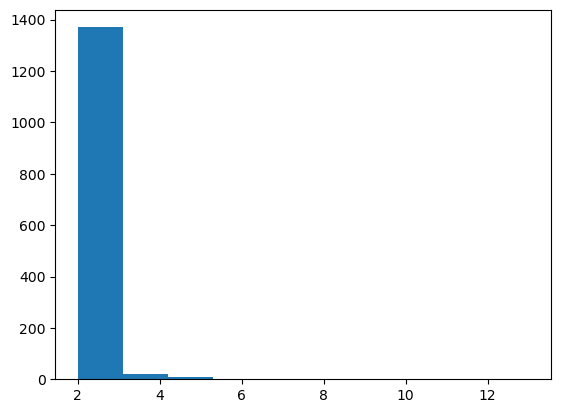

In [9]:
import matplotlib.pyplot as plt

plt.hist(groupby_df[groupby_df['nunique']>=2]['nunique'])